In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [23]:
# === Configuración ===
sns.set(style="whitegrid")
metrics_dir = Path(".")
models = ["logistic_regression", "random_forest", "gradient_boosting"]

In [24]:
# === Cargar CSVs ===
dfs = []
for model in models:
    path = metrics_dir / f"{model}_metrics.csv"
    df = pd.read_csv(path)
    df["Model"] = model.replace("_", " ").title()
    dfs.append(df)

In [25]:
metrics_df = pd.concat(dfs, ignore_index=True)

In [26]:
# === Mostrar tabla comparativa ===
display(metrics_df[["Model", "Precision", "Recall", "F1_score", "MSE"]].sort_values("F1_score", ascending=False))

,Model,Precision,Recall,F1_score,MSE
2,Gradient Boosting,0.714513,0.827343,0.766800,0.234067
1,Random Forest,0.715683,0.741628,0.728425,0.257216
0,Logistic Regression,0.578173,0.458986,0.511731,0.407402


In [27]:
# === Gráfico de barras por métrica ===
metrics_to_plot = ["Precision", "Recall", "F1_score", "MSE"]

/var/folders/hh/qp6xbq955yxbbsq282hdjbnr0000gn/T/ipykernel_83956/1429339359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Model", y=metric, palette="viridis")


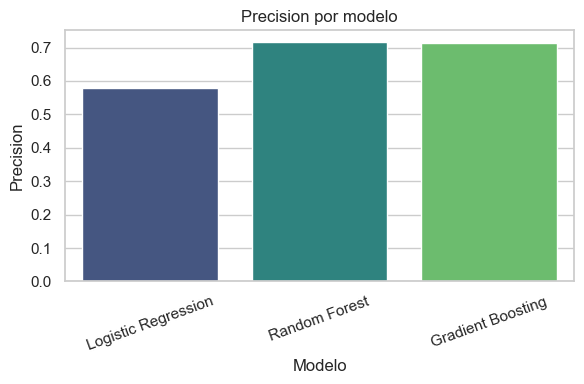

/var/folders/hh/qp6xbq955yxbbsq282hdjbnr0000gn/T/ipykernel_83956/1429339359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Model", y=metric, palette="viridis")


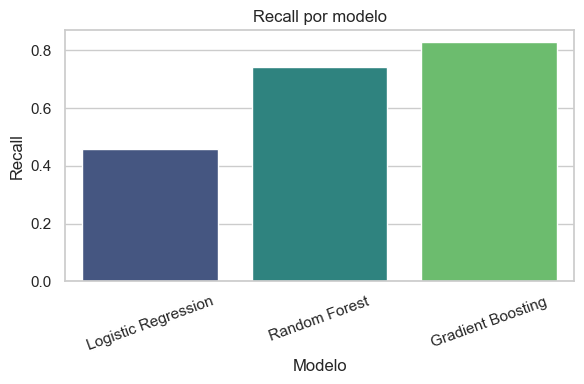

/var/folders/hh/qp6xbq955yxbbsq282hdjbnr0000gn/T/ipykernel_83956/1429339359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Model", y=metric, palette="viridis")


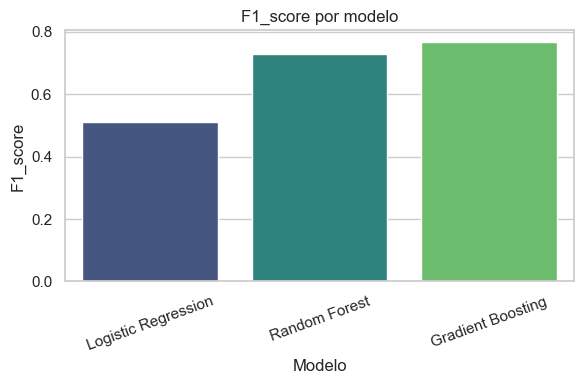

/var/folders/hh/qp6xbq955yxbbsq282hdjbnr0000gn/T/ipykernel_83956/1429339359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Model", y=metric, palette="viridis")


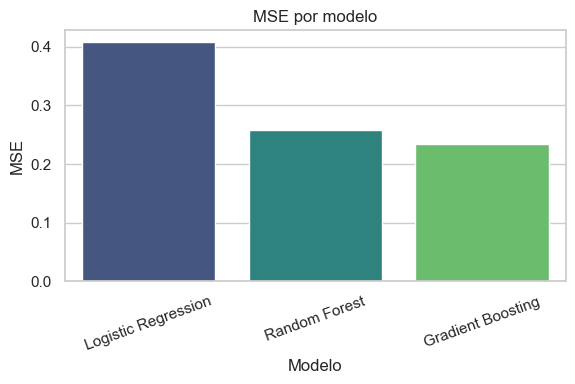

In [28]:
for metric in metrics_to_plot:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=metrics_df, x="Model", y=metric, palette="viridis")
    plt.title(f"{metric} por modelo")
    plt.ylabel(metric)
    plt.xlabel("Modelo")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

In [29]:
# === Mejor modelo según F1 y MSE ===
best_f1 = metrics_df.loc[metrics_df["F1_score"].idxmax()]
best_mse = metrics_df.loc[metrics_df["MSE"].idxmin()]

In [30]:
print("\nMejor modelo según F1_score:")
print(f"- Modelo: {best_f1['Model']}")
print(f"- F1_score: {best_f1['F1_score']:.3f}")


Mejor modelo según F1_score:
- Modelo: Gradient Boosting
- F1_score: 0.767


In [31]:
print("\nMejor modelo según menor MSE:")
print(f"- Modelo: {best_mse['Model']}")
print(f"- MSE: {best_mse['MSE']:.3f}")


Mejor modelo según menor MSE:
- Modelo: Gradient Boosting
- MSE: 0.234
